# Main program GAIA-NIR

## Purpose

The main program handles the overall simulation flow by calling methods from the Spectrum and Parameters classes.\
The Spectrum class encapsulates all spectrum-related operations, including loading, processing, and saving the spectrum. \
The Parameters class handles configuration.


## Version History
- **v9.0**: Update: 

- Parameter Class modification to now utilize Pydantic


Last Edited: 2025-03-17


## Flowchart of first overview of program

## Main program


In [1]:
from spectrum import Spectrum
from parameters import Parameters
import logging
import os

logging.basicConfig(
    level=logging.INFO,
    format="[%(funcName)s] %(message)s",)

In [2]:
def main():
    """
    Main function to control the simulation flow.
    """
    params = Parameters.load_from_json()
    params.save_to_json()

    spectrum = Spectrum()
    spectrum.load_spectrum(params.input_file)
    spectrum.convert_units(parameters=params)

    if params.apply_convolution:
        spectrum.convolve_spectrum(parameters=params)
    
    if params.apply_resampling:
        spectrum.resample_spectrum(parameters=params)

    spectrum.rescale_flux(parameters=params)

    base_name = os.path.splitext(os.path.basename(params.input_file))[0]
    
    original = spectrum.copy()
    for i in range(params.num_output_spectra):
        spectrum = original.copy()  
        spectrum.radial_velocity_shift(parameters = params)  
        spectrum.resample_stochastic(parameters = params)  
        spectrum.generate_noise(parameters = params)  
        spectrum.save_spectrum(output_file=f"{base_name}_snr{int(params.snr)}_{i+1:04d}.txt")

    logging.info(f"Simulation complete.")


[save_to_json] Parameters saved to 'config.json'
[load_spectrum] Loaded spectrum from 'gaia_055000450000.txt' successfully.
[convert_units] Converted units from nm to Ångströms.
[convolve_spectrum] Sigma wavelength units: 0.32 Å, pixel units: 31.94
[convolve_spectrum] Gaussian convolution completed.
[convolve_spectrum] Flux before & after convolution: 1887597561.000 | 1887597438.861
[convolve_spectrum] [convolve_spectrum] Flux conservation ratio: 1.000000


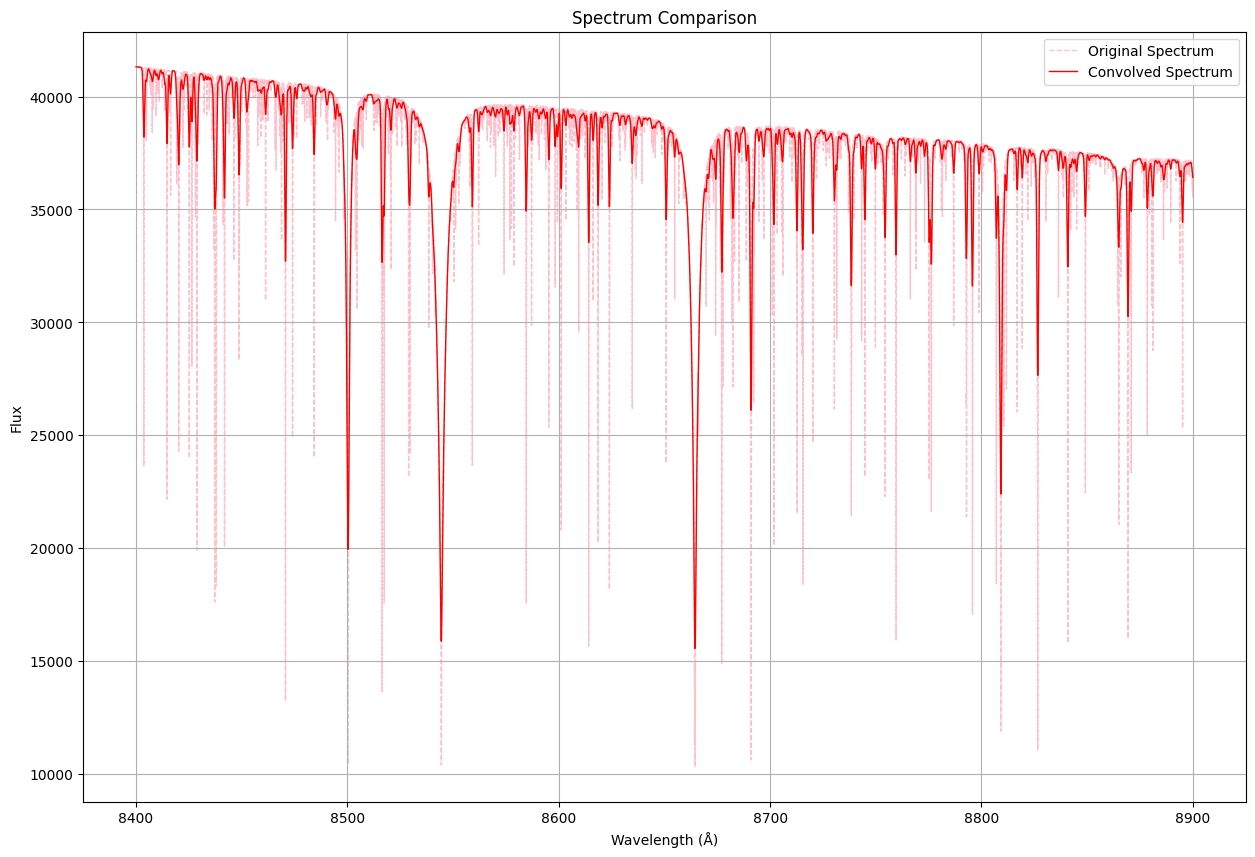

[resample_spectrum] Resampling completed.
[resample_spectrum] First: 8400.01 Å, Center:8649.885000000475 Å, Last: 8899.76 Å
[resample_spectrum] Pixel size: 0.25 Å, New grid points: 2000.


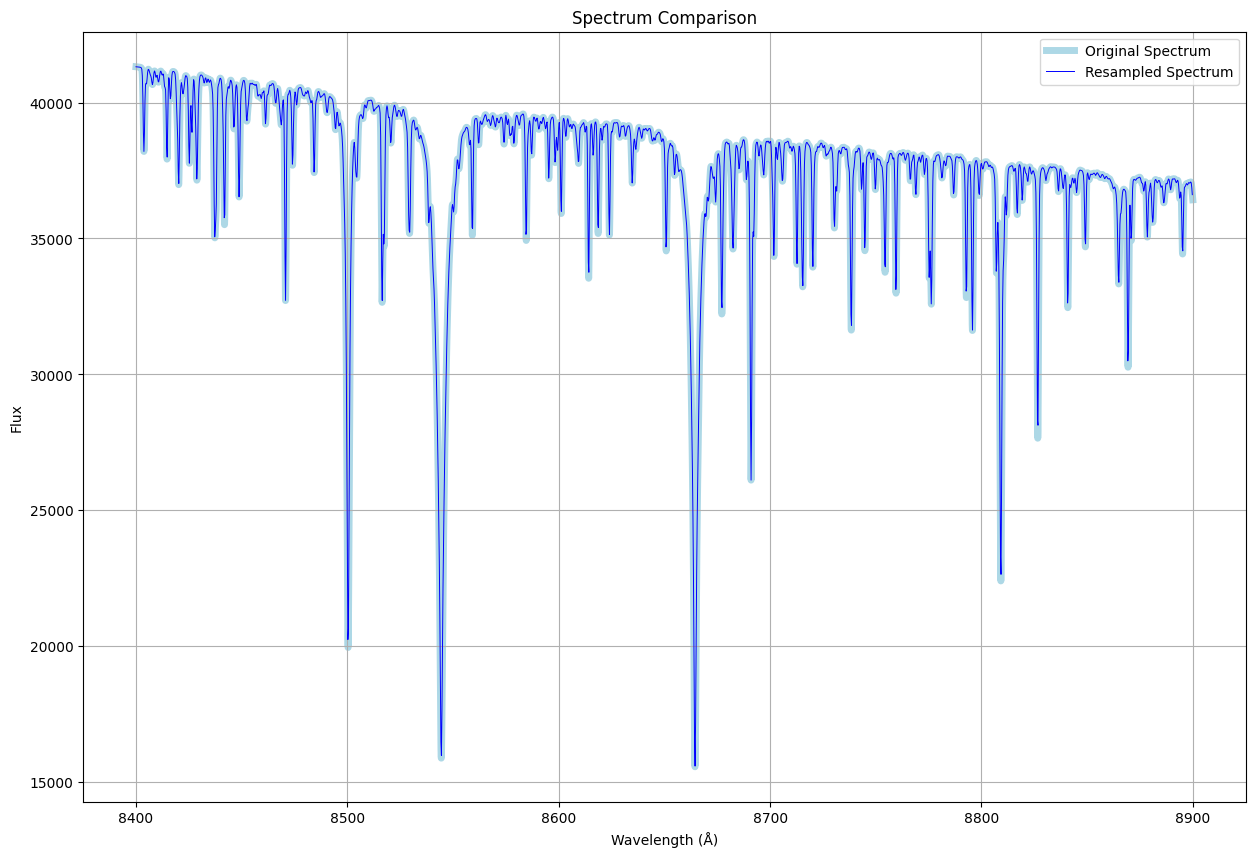

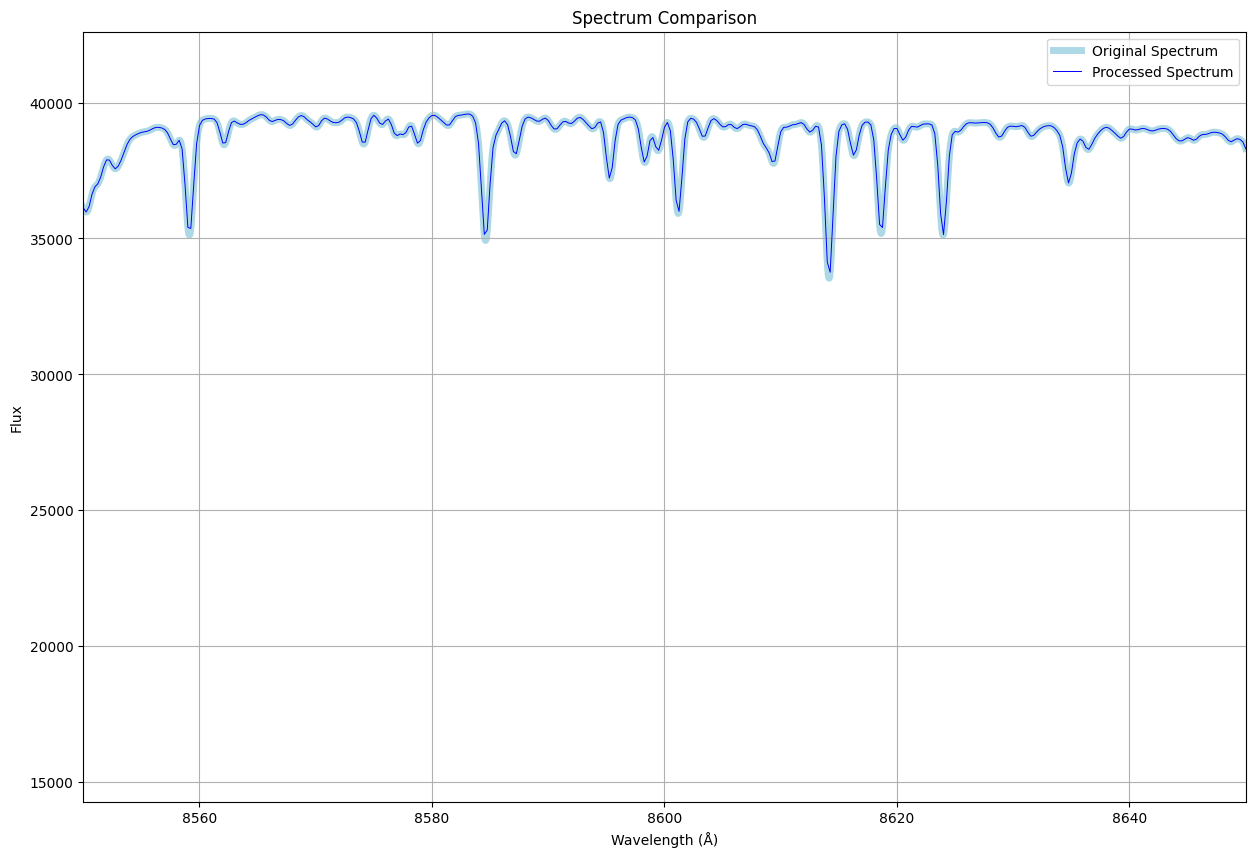

[rescale_flux] Reference flux level before: 39578.251
[rescale_flux] Max flux after: 100.000
[rescale_flux] Rescaling completed.


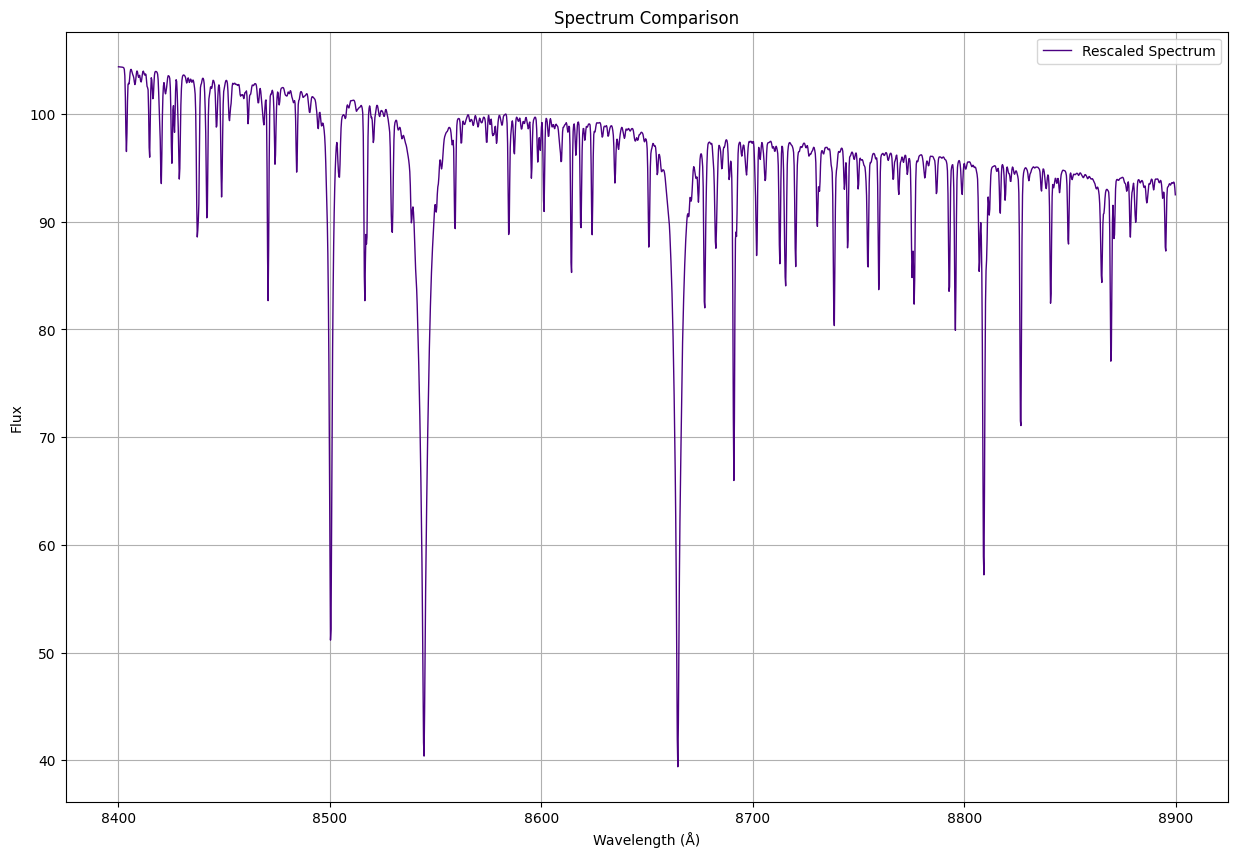

[radial_velocity_shift] Applying radial velocity shift
[resample_stochastic] Resampling spectrum for stochastic process
[generate_noise] Noise Generation Completed.
[generate_noise] Mean: 95.43, std: 12.30, estimated snr : 7.76


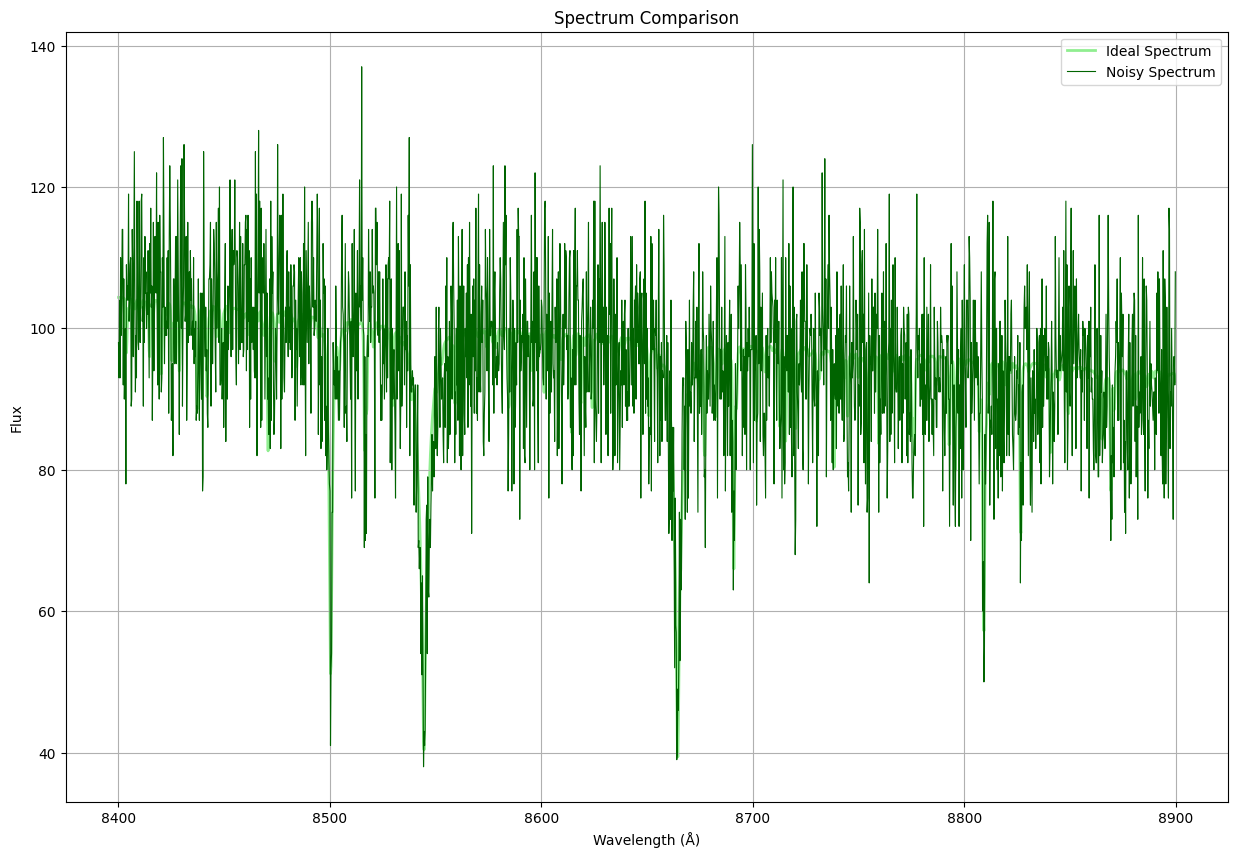

[save_spectrum] Spectrum saved to 'gaia_055000450000_snr10_0001.txt'.
[radial_velocity_shift] Applying radial velocity shift
[resample_stochastic] Resampling spectrum for stochastic process
[generate_noise] Noise Generation Completed.
[generate_noise] Mean: 95.52, std: 12.24, estimated snr : 7.80


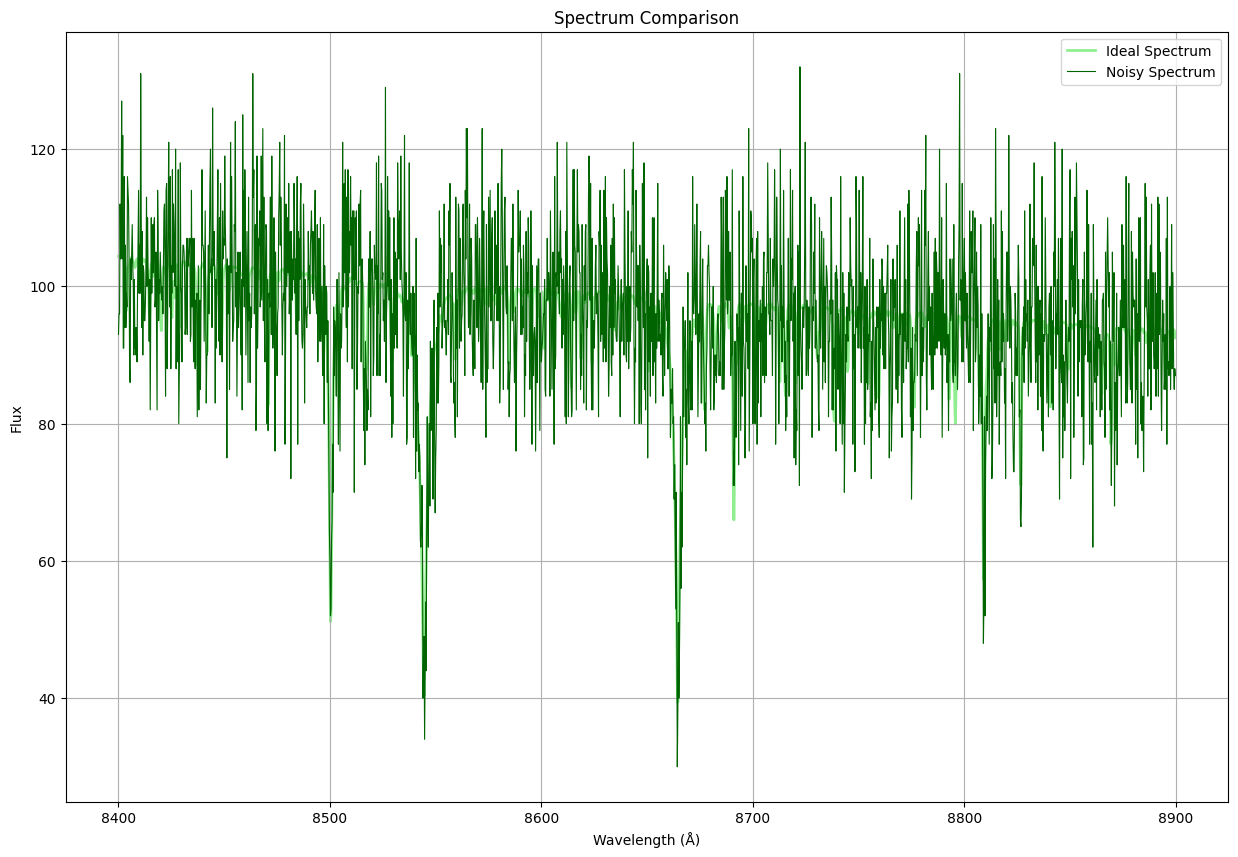

[save_spectrum] Spectrum saved to 'gaia_055000450000_snr10_0002.txt'.
[radial_velocity_shift] Applying radial velocity shift
[resample_stochastic] Resampling spectrum for stochastic process
[generate_noise] Noise Generation Completed.
[generate_noise] Mean: 95.22, std: 12.26, estimated snr : 7.76


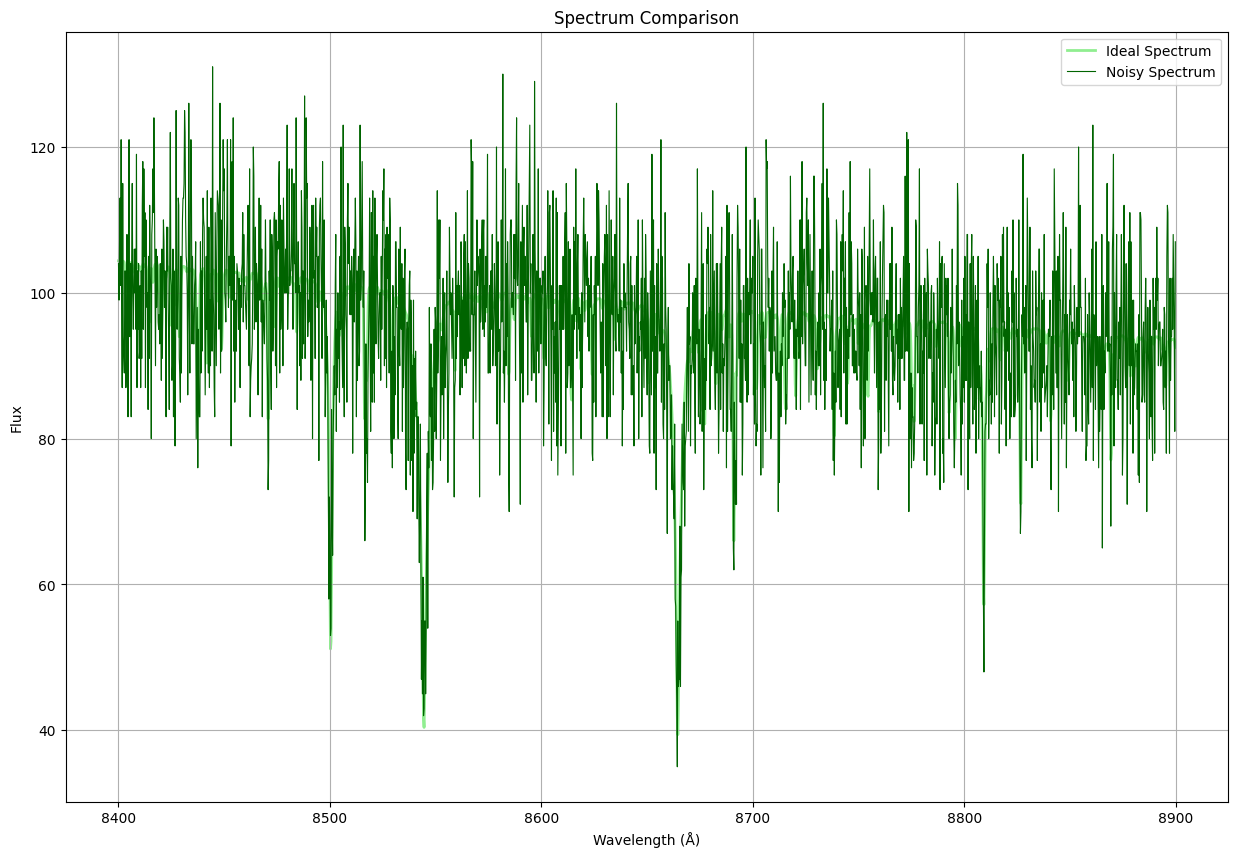

[save_spectrum] Spectrum saved to 'gaia_055000450000_snr10_0003.txt'.
[main] Simulation complete.


In [3]:
main()

In [4]:
import numpy as np
flux = np.full(1000, 95.0)
noisy = np.random.poisson(flux)
print("Estimated SNR:", np.mean(noisy) / np.std(noisy))


Estimated SNR: 9.381744104019116
